<a href="https://colab.research.google.com/github/humayun-mhk/Machine_Learning/blob/main/Gradient%20Descent%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Decsent**

# **With Victorization**

Iteration 0: Cost = 2399.616581150632
Iteration 100: Cost = 423.9435247969836
Iteration 200: Cost = 552.2077529806407
Iteration 300: Cost = 657.6227808575848
Iteration 400: Cost = 758.9811840473252
Iteration 500: Cost = 867.326232746139
Iteration 600: Cost = 984.6016604913425
Iteration 700: Cost = 1111.1208708354054
Iteration 800: Cost = 1246.9336530063151
Iteration 900: Cost = 1392.0478774216247


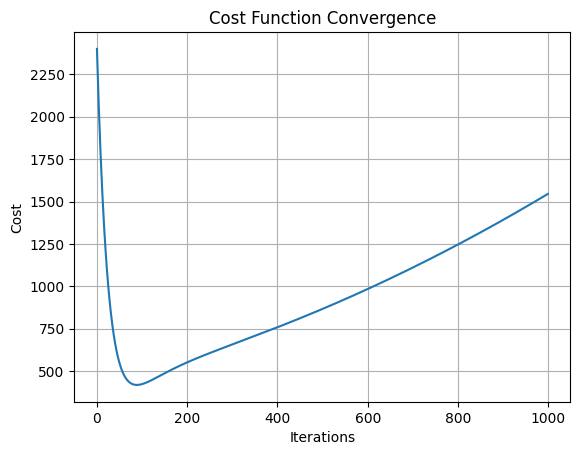

Final weight (w): [8.80442581]
Final bias (b): [-0.97484844]


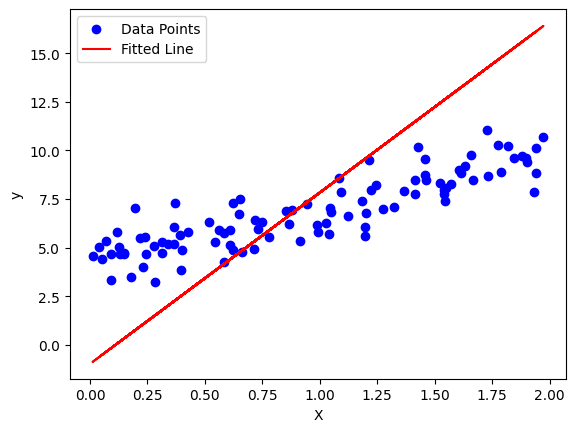

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Hyperparameters
learning_rate = 0.0001
n_iterations = 1000
m = len(X)

# Initialize parameters
w = np.random.randn(1)
b = np.zeros(1)

# Helper function to calculate MSE
def compute_cost(X, y, w, b):
    m = len(y)
    cost = (1/(2*m)) * np.sum((X.dot(w) + b - y) ** 2)
    return cost

# Gradient Descent
cost_history = []

for i in range(n_iterations):
    # Predictions
    y_pred = X.dot(w) + b

    # Calculate gradients
    dw = (1/m) * np.sum((y_pred - y) * X)
    db = (1/m) * np.sum(y_pred - y)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Store cost for visualization
    cost = compute_cost(X, y, w, b)
    cost_history.append(cost)

    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost}")

# Plot cost history
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

# Final parameters
print(f"Final weight (w): {w}")
print(f"Final bias (b): {b}")

# Plotting the fitted line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X.dot(w) + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# **Without Victorization**

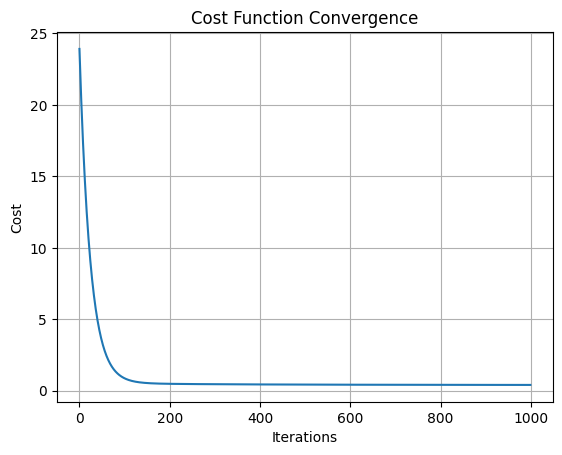

Final weight (w): 2.931747276125154
Final bias (b): 4.032034044735946


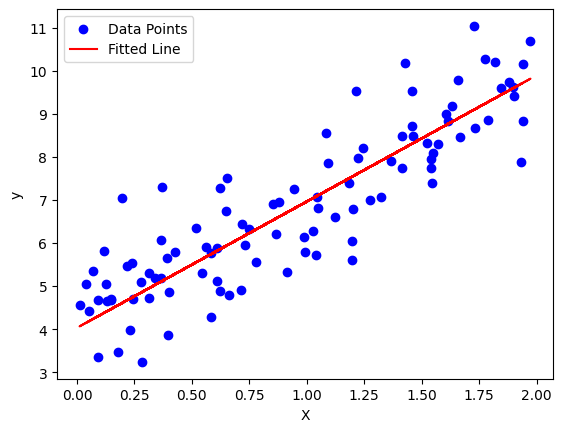

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Flatten X and y for non-vectorized calculations
X = X.flatten()
y = y.flatten()

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(X)

# Initialize parameters
w = np.random.randn()
b = 0

# Helper function to calculate MSE
def compute_cost(X, y, w, b):
    total_cost = 0
    m = len(X)
    for i in range(m):
        y_pred = w * X[i] + b
        total_cost += (y_pred - y[i]) ** 2
    return total_cost / (2 * m)

# Gradient Descent without vectorization
cost_history = []

for _ in range(n_iterations):
    # Initialize gradients
    dw = 0
    db = 0

    # Calculate gradients using loops
    for i in range(m):
        y_pred = w * X[i] + b
        dw += (y_pred - y[i]) * X[i]
        db += (y_pred - y[i])

    dw /= m
    db /= m

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Calculate and store cost for visualization
    cost = compute_cost(X, y, w, b)
    cost_history.append(cost)

# Plot cost history
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

# Final parameters
print(f"Final weight (w): {w}")
print(f"Final bias (b): {b}")

# Plotting the fitted line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, w * X + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# **MULTIPLE VARIABLES**

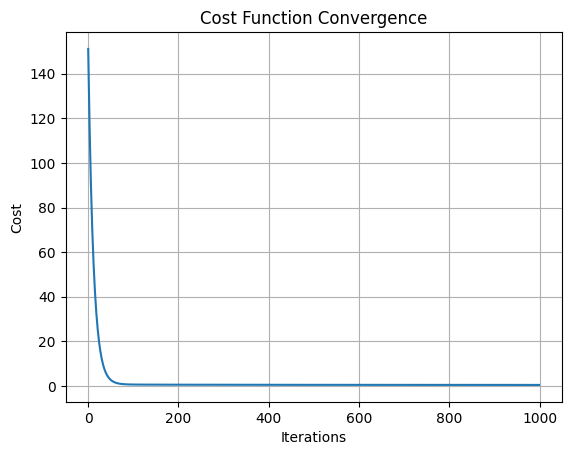

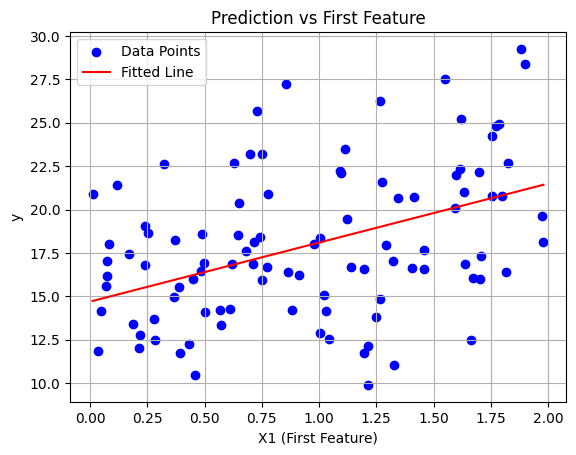

Final weights: [3.39940029 4.09026138 5.52985824]
Final bias: 5.014159320337871
True weights: [3 4 5]
True bias: 6


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for Multiple Linear Regression
np.random.seed(42)
m = 100  # Number of training examples
n = 3    # Number of features

# Creating synthetic features (X1, X2, X3)
X = 2 * np.random.rand(m, n)
true_weights = np.array([3, 4, 5])  # True weights for generating the data
true_bias = 6
noise = np.random.randn(m)

# Target variable
y = np.dot(X, true_weights) + true_bias + noise

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Initialize parameters
weights = np.random.randn(n)  # One weight for each feature
bias = 0

# Helper function to calculate MSE
def compute_cost(X, y, weights, bias):
    total_cost = 0
    m = len(X)
    for i in range(m):
        y_pred = np.sum(X[i] * weights) + bias
        total_cost += (y_pred - y[i]) ** 2
    return total_cost / (2 * m)

# Gradient Descent without vectorization
cost_history = []

for _ in range(n_iterations):
    # Initialize gradients
    dweights = np.zeros(n)
    dbias = 0

    # Calculate gradients using loops
    for i in range(m):
        y_pred = np.sum(X[i] * weights) + bias
        error = y_pred - y[i]

        # Gradients for weights
        for j in range(n):
            dweights[j] += error * X[i][j]

        # Gradient for bias
        dbias += error

    # Average gradients
    dweights /= m
    dbias /= m

    # Update parameters
    for j in range(n):
        weights[j] -= learning_rate * dweights[j]
    bias -= learning_rate * dbias

    # Calculate and store cost for visualization
    cost = compute_cost(X, y, weights, bias)
    cost_history.append(cost)

# Plot cost history
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()
# Visualize the relationship with the first feature (X1)
plt.scatter(X[:, 0], y, color='blue', label='Data Points')

# Predictions for plotting (Fixing other features at their mean values)
X_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X_plot_full = np.zeros((100, n))
X_plot_full[:, 0] = X_plot
for i in range(1, n):
    X_plot_full[:, i] = np.mean(X[:, i])

y_plot = np.dot(X_plot_full, weights) + bias

plt.plot(X_plot, y_plot, color='red', label='Fitted Line')
plt.xlabel('X1 (First Feature)')
plt.ylabel('y')
plt.title('Prediction vs First Feature')
plt.legend()
plt.grid(True)
plt.show()

# Final parameters
print(f"Final weights: {weights}")
print(f"Final bias: {bias}")

# Compare with true weights and bias
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")
